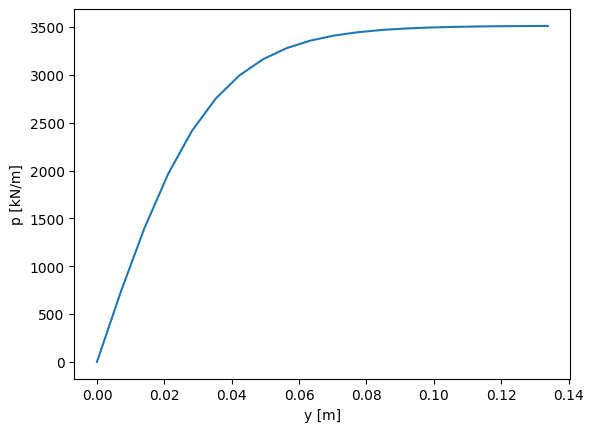

In [5]:
# import p-y curve for api_sand from openpile.utils
from openpile.utils.py_curves import api_sand

y, p = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="static",  # static curve
)

# create a plot of the results with Matplotlib
import matplotlib.pyplot as plt

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")

plt.savefig("../docs/source/_static/usage/pycurves/api_sand_example_build.png")
